## Graphing Weekly League Table Rankings

### Get Data

In [1]:
import pandas as pd

df = pd.DataFrame()
for i in range(1, 18):
	i = i if i>=10 else f"0{i}"
	tab = pd.read_html(f"https://www.eplreview.com/epl2020-21_table_matchweek{i}.htm")[1]
	df[f'{int(i)}'] = tab.loc[:, ('Unnamed: 3_level_0','Team')]
df['0'] = sorted(df['1'].values)

In [2]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Arsenal,Arsenal,Leicester,Leicester,Everton,Everton,Everton,Liverpool,Leicester,Tottenham,Tottenham,Tottenham,Tottenham,Liverpool,Liverpool,Liverpool,Liverpool,Liverpool
1,Aston Villa,Leicester,Everton,Liverpool,Aston Villa,Aston Villa,Liverpool,Leicester,Tottenham,Liverpool,Liverpool,Liverpool,Liverpool,Tottenham,Leicester,Everton,Man United,Man United
2,Brighton,Chelsea,Arsenal,Everton,Leicester,Liverpool,Aston Villa,Tottenham,Liverpool,Chelsea,Chelsea,Chelsea,Leicester,Southampton,Man United,Leicester,Leicester,Leicester
3,Burnley,Newcastle,Liverpool,Aston Villa,Arsenal,Leicester,Leicester,Everton,Southampton,Leicester,Leicester,Leicester,Southampton,Leicester,Everton,Man United,Everton,Tottenham
4,Chelsea,Wolverhampton,Crystal Palace,Arsenal,Liverpool,Arsenal,Tottenham,Southampton,Chelsea,Southampton,West Ham,Southampton,Chelsea,Everton,Chelsea,Tottenham,Aston Villa,Man City
5,Crystal Palace,Liverpool,Tottenham,Crystal Palace,Tottenham,Wolverhampton,Leeds,Wolverhampton,Aston Villa,Everton,Southampton,Man United,West Ham,Man United,Tottenham,Man City,Chelsea,Southampton
6,Everton,Crystal Palace,Man City,Leeds,Chelsea,Tottenham,Southampton,Chelsea,Everton,Aston Villa,Wolverhampton,Man City,Everton,Chelsea,Southampton,Aston Villa,Tottenham,Everton
7,Fulham,Everton,Brighton,Tottenham,Leeds,Chelsea,Crystal Palace,Aston Villa,Crystal Palace,West Ham,Everton,West Ham,Man United,West Ham,Man City,Chelsea,Man City,Aston Villa
8,Leeds,Aston Villa,Aston Villa,Chelsea,Newcastle,West Ham,Wolverhampton,Arsenal,Wolverhampton,Wolverhampton,Man United,Everton,Man City,Man City,Aston Villa,Southampton,Southampton,Chelsea
9,Leicester,Burnley,Leeds,Newcastle,West Ham,Leeds,Chelsea,Man City,Man City,Man United,Aston Villa,Wolverhampton,Aston Villa,Wolverhampton,West Ham,West Ham,West Ham,West Ham


### Plot Data

In [3]:
from glob import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rc

from typing import Tuple, Union

In [4]:
Path = mpath.Path

def get_patch(p1: Tuple, p2: Tuple, color: Union[str, Tuple]):
    """ Returns a patch of bezier curve from one point to another
    We have 3 cases to consider depending on the x coordinate of the 2 points - p1, p2:
    1. When next point (p2) > previous point (p1)
    2. When p2 < p1
    3. When p2 == p1
    
    Depending on the case, we draw a bezier curve from the coressponding control points and then return that patch
    
    Args: 
        - p1, p2 (tuples): 2 tuples of x,y points  
        - color (str/rgba tuple): color of line 
    Returns:
        - patch (instance of mpl patch)
    """

    x1, y1 = p1; x2, y2 = p2
    
    if y2 > y1:
        patch = mpatches.PathPatch(
            Path(
                 [p1, (x1+(x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1+(x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    elif y2 < y1:
        patch = mpatches.PathPatch(
            Path([p1, (x1 + (x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1 + (x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    else:
        patch = mpatches.PathPatch(
            Path([p1, p2],
                 [Path.MOVETO, Path.LINETO]), ec=color, fc='none', zorder=5)

    return patch

def imscatter(x, y, image, ax=None, zoom=1):
    """ Function to plot the team crests (stackoverflow.com/questions/35651932/plotting-img-with-matplotlib/35651933)"""
    
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


In [5]:
###the team_names, colors and logos are in order

teams = df['0'].values

colors = ['#FF0000',
'#85001B',
'#0055A9',
'#81001A',
'#0000BE',
'#1B458F',
'#0078EF',
'k',
'#FFCD00',
'#0023CB',
'#DE0000',
'#98C5E9',
'#DA020E',
'#241F20',
'#EE2737',
'#ED1A3B',
'#001C58',
'#122F67',
'#60223B',
'#FDB913']

images = [
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Arsenal_FC.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Aston_Villa.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Brighton_&_Hove_Albion.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Burnley_FC.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Chelsea_FC.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Crystal_Palace.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Everton_FC.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Fulham.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Leeds.png",    
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Leicester_City.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Liverpool_FC.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Manchester_City.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Manchester_United.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Newcastle_United.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Sheffield_United.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Southampton_FC.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Tottenham_Hotspur.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\West_Brom.png",    
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\West_Ham_United.png",
r"C:\Repository\football_utils\Football Top 5 Leagues Team Logos\logos\Premier League\Wolverhampton_Wanderers.png"] ##path to my team logos scraped from tranfermarkt

In [6]:
rc('font',**{'family':'sans-serif','sans-serif':['Goldman Sans']})    

fig, ax = plt.subplots(figsize=(12,8))

for team_name, color, img_path in zip(teams, colors, images):
    indices = df[df == team_name].stack().index.tolist()
    coords = [(idx[1], idx[0]) for idx in indices]
    coords = [(int(coord[0]), coord[1]) for coord in coords]
    coords = sorted(coords, key=lambda x: x[0])

    ###
    for p1, p2 in zip(coords[:-1], coords[1:]):
        patch = get_patch(p1, p2, color)
        ax.add_patch(patch)
    
    imscatter(x=17.5, y=coords[-1][-1], image = img_path, ax=ax, zoom=0.1)
    
ax.set_axis_off()
ax.set(xlim=(-2,20), ylim=(-2,22))
ax.title.set(text='PL 20/21: League Table', x=.5, y=0, ha='center', va='center', fontweight='light', fontsize=28)
ax.text(8.5, 20.5, 'Gameweek', fontsize=12, va='center', ha='center')
ax.text(-1, 10, 'Rank', rotation=90, fontsize=12, va='bottom', ha='center')
[ax.text(i, 19.5, i, ha='center', va='center', size=7) for i in range(1, 18)]
[ax.text(-0.5, i, i+1, ha='center', va='center', size=7) for i in range(20)]    
for i in range(18):
    for j in range(20):
        ax.scatter(i, j, fc='0.5', alpha=.3, zorder=1)
ax.vlines(x=list(range(18)), ymin=0, ymax=19, fc='0.5', alpha=.3, zorder=1)        
ax.invert_yaxis()

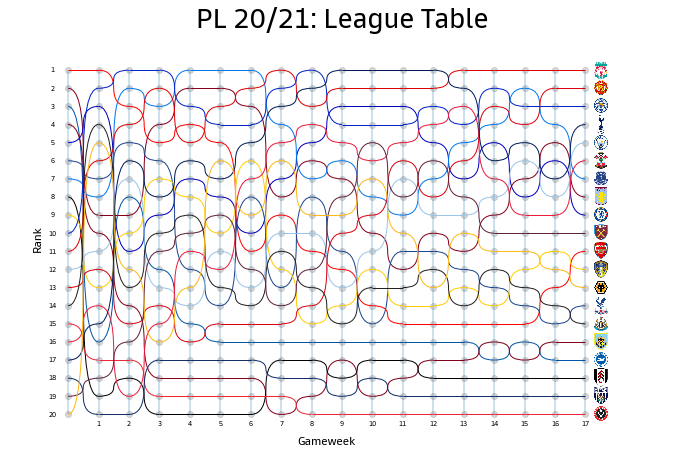

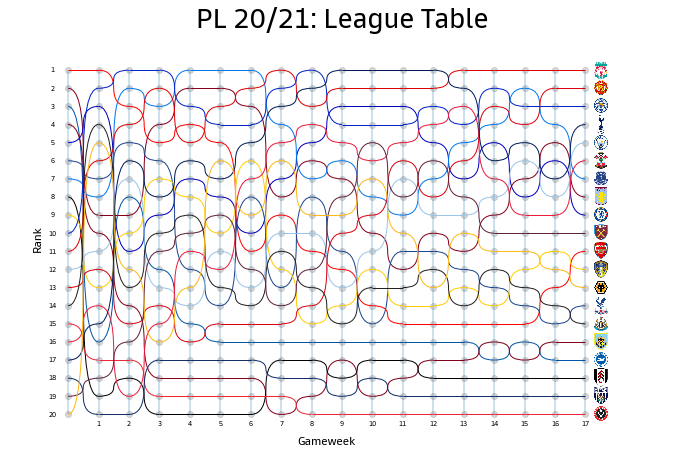

In [7]:
fig

It all looks way too busy right now with 20 different colors. You'd probably want to just highlight one team and its color, and keep the other colors grey. That is fairly easy to do with a simple conditional statement. Also, this is just one way to do it - there are probably simpler ways to loop over the data. 

In [8]:
fig.savefig('final.png', dpi=180)